In [1]:
pip install PySimpleGUI

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


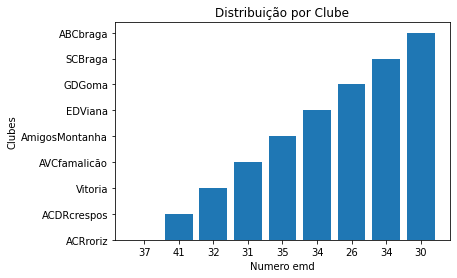

In [3]:
import PySimpleGUI as sg
import EMDmodulo as emd

conteudo = []

interfacePrincipal = [
    [sg.Text(size = (50, 1), key="-Dados-")], #primeira linha será uma de texto
    [sg.Button("Carregar Base de dados"), sg.Button("Listar base de dados")], # segunda linha tera 2 botoes
    [sg.Button("Modalidades"),sg.Button("Distribuições"), sg.Button("Limpar"), sg.Button("Sair")], # terceira linha 4 botoes
    [sg.Listbox(values = conteudo, size=(40,10), key = "_cont")] # quarta linha sera um retangulo branco com o conteudo
]   

#janela principal
windowP = sg.Window(title="Exames médicos desportivos", font="Helvetica 24" , default_element_size=(50,10)).Layout(interfacePrincipal)

#funcao especifica das distribuicoes ira aparecer uma nova janela
def interfaceDistribuicoes():
    distr = []
    novainterface = [
        [sg.Text("De que pretende que seja a sua distribuição?")],
        [sg.Button("Modalidades"), sg.Button("Clube"), sg.Button("Ano"), sg.Button("Gráfico")],
        [sg.Listbox(values = distr, size = (36,10), key = "_cont2")],
        [sg.Button("Sair")]
    ]
    
    windowD = sg.Window(title="Janela de Distribuições", font="Arial 20" , default_element_size=(36,1)).Layout(novainterface)
    
    stop = False
    while not stop:
        event2, values2 = windowD.read()
        if event2 == "Sair" or event2 == sg.WIN_CLOSED:
            stop = True 

        elif event2 == "Modalidades":
            distr = [emd.distribPorModalidade()]
            windowD["_cont2"].Update(values = distr)
            x = "Modalidade"

        elif event2 == "Clube":
            distr = [emd.distribPorClube()]
            windowD["_cont2"].Update(values = distr)
            x = "Clube"

        elif event2 == "Ano":
            distr = [emd.distribPorAno()]
            windowD["_cont2"].Update(values = distr)
            x = "Ano"

        elif event2 == "Gráfico": #nao sei como o incluir na janela
            distr = [emd.plotDistrib(x)]
            windowD["_cont2"].Update(values = distr)

    windowD.close()

#voltando a janela principal    
stop = False
while not stop:
    event,values = windowP.read()
    BD = emd.lerDataset()
    if event == "Sair" or event == sg.WIN_CLOSED:
        stop=True
    
    elif event == "Carregar Base de dados":
        contador = len(BD)
        dados = "Foram carregados " + str(contador) + " exames médicos."
        windowP["-Dados-"].update(dados)
        
    elif event == "Listar base de dados":
        dados = ["{:<14} {:<20} {:<25} {:<8}".format('Id','Data','Nome','Apto')]
        for registo in BD:
            nome = registo [2] + " " + registo [3]
            dados.append("{:<10} {:<15} {:<25} {:<8}".format(registo[0],registo [1],nome,registo[11]) )
        windowP["_cont"].Update(values=dados)
    elif event == "Limpar":
        conteudo = []
        windowP["_cont"].Update(values=conteudo)
    
    elif event == "Modalidades":
        conteudo = emd.modalidades()
        windowP["_cont"].Update(values=conteudo)
    
    elif event == "Distribuições":
        interfaceDistribuicoes()

    else:
        print(event + "\n")
        print(values)

windowP.close()